In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('matchtable.csv')

In [3]:
df.head

<bound method NDFrame.head of       int_chllS_1000  int_chllS_300        oc      kd        lat        lon  \
0          18.634841      18.634841  0.268040  0.0528  25.759870 -80.039880   
1          26.339804      26.339804  0.235600  0.0486  25.783750 -80.031720   
2          30.441570      30.441570  0.166175  0.0410  25.808190 -80.023130   
3          27.776776      27.776776  0.149014  0.0370  25.835700 -80.015380   
4          13.253941      13.253941  0.139009  0.0346  25.871000 -80.001070   
...              ...            ...       ...     ...        ...        ...   
5169        5.251709       5.251709  0.765232  0.0912  40.867290 -71.001180   
5170        4.423945       4.423945  0.765232  0.0912  40.867511 -71.000410   
5171        4.270035       4.270035  0.765232  0.0912  40.869021 -70.999932   
5172        4.451968       4.451968  0.835308  0.0964  40.870837 -70.999071   
5173        4.673818       4.673818  0.803958  0.0942  40.877700 -71.003770   

      year  month  mo

In [4]:
y_300=df['int_chllS_300']
y_1000=df['int_chllS_1000']
X=df[['oc','kd','yearday','lat','lon']]


# we will rerun with both start w the deep deep. 
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y_300,test_size=0.2,random_state=4)
X_train,X_test,y_train,y_test = train_test_split(X,y_1000,test_size=0.2,random_state=4)

len(X_train)

4139

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
# For loop to find the best model k
k = []
r2_train = []
r2_test = []
RMSE = []

loops = range(1,31)

for n in loops:
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(standardized_X, y_train)

    # Use the model to predict y 
    y_pred = model.predict(standardized_X_test)
    
    # Form our lists to plot
    k.append(n)
    r2_train.append(r2_score(y_train, model.predict(standardized_X)))
    r2_test.append(r2_score(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))

    


In [7]:
df_out_knn = pd.DataFrame(data=[k,r2_test])

df_out_knn.to_csv('/Users/frank/Documents/classes/env.datascience_clayton/capstone/knn_out.csv')  
df_out_knn.head

<bound method NDFrame.head of          0        1         2         3         4         5         6   \
0  1.000000  2.00000  3.000000  4.000000  5.000000  6.000000  7.000000   
1  0.528813  0.60394  0.600215  0.568306  0.553017  0.541931  0.535893   

        7         8          9   ...         20         21         22  \
0  8.00000  9.000000  10.000000  ...  21.000000  22.000000  23.000000   
1  0.52493  0.516875   0.501019  ...   0.413015   0.407169   0.400729   

          23        24         25         26         27        28         29  
0  24.000000  25.00000  26.000000  27.000000  28.000000  29.00000  30.000000  
1   0.395354   0.39631   0.392656   0.386234   0.382876   0.37912   0.379036  

[2 rows x 30 columns]>

0.6039396990131268
2


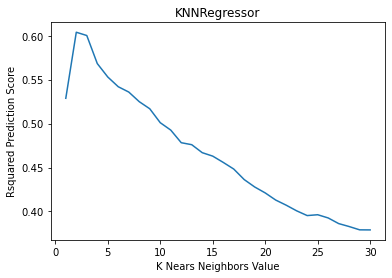

In [8]:
plt.plot(k,r2_test)
plt.xlabel('K Nears Neighbors Value')
plt.ylabel('Rsquared Prediction Score')
plt.title("KNNRegressor")


print(r2_test[1])
print(k[1])

In [9]:
from sklearn.neural_network import MLPRegressor

In [10]:
mlp = MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000,random_state=10)
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=10)

In [11]:
# # try makign some predictions using your classifier
# predictions = mlp.predict(X_test)

# plt.plot(y_test, predictions, 'ro')
# print(r2_score(y_test, predictions))

In [12]:
# now build a loop to test how well different number of hidden layers performs
scores = []
scores_list = []
nidx = []
nueroidx = []
layeridx = []

l_range = range(1, 50, 10)
neurons = range(1, 300, 25)



for l in l_range:
    for neuron in neurons:
        
        print(f"Combination: {l} layers with {neuron} neurons.") 
        model = MLPRegressor(hidden_layer_sizes=(neuron,)*l, random_state=4, max_iter=10000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        scores = r2_score(y_test,y_pred)
        scores_list.append(r2_score(y_test,y_pred))
        nueroidx.append(neuron)
        layeridx.append(l)
        nidx.append((l/10)+(neuron/160))

Combination: 1 layers with 1 neurons.
Combination: 1 layers with 26 neurons.
Combination: 1 layers with 51 neurons.
Combination: 1 layers with 76 neurons.
Combination: 1 layers with 101 neurons.
Combination: 1 layers with 126 neurons.
Combination: 1 layers with 151 neurons.
Combination: 1 layers with 176 neurons.
Combination: 1 layers with 201 neurons.
Combination: 1 layers with 226 neurons.
Combination: 1 layers with 251 neurons.
Combination: 1 layers with 276 neurons.
Combination: 11 layers with 1 neurons.
Combination: 11 layers with 26 neurons.
Combination: 11 layers with 51 neurons.
Combination: 11 layers with 76 neurons.
Combination: 11 layers with 101 neurons.
Combination: 11 layers with 126 neurons.
Combination: 11 layers with 151 neurons.
Combination: 11 layers with 176 neurons.
Combination: 11 layers with 201 neurons.
Combination: 11 layers with 226 neurons.
Combination: 11 layers with 251 neurons.
Combination: 11 layers with 276 neurons.
Combination: 21 layers with 1 neurons.

In [13]:
df_out_mlp = pd.DataFrame(data=[nidx,scores_list,nueroidx,layeridx])
df_out_mlp.to_csv('/Users/frank/Documents/classes/env.datascience_clayton/capstone/mlp_out.csv') 
df_out_mlp.head


<bound method NDFrame.head of         0          1         2          3           4           5   \
0  0.10625   0.262500   0.41875   0.575000    0.731250    0.887500   
1  0.02195   0.177904   0.17809   0.143458    0.140997    0.156527   
2  1.00000  26.000000  51.00000  76.000000  101.000000  126.000000   
3  1.00000   1.000000   1.00000   1.000000    1.000000    1.000000   

           6           7           8           9   ...         50         51  \
0    1.043750    1.200000    1.356250    1.512500  ...   4.418750   4.575000   
1    0.183691    0.197051    0.190474    0.188036  ...   0.162664   0.168232   
2  151.000000  176.000000  201.000000  226.000000  ...  51.000000  76.000000   
3    1.000000    1.000000    1.000000    1.000000  ...  41.000000  41.000000   

           52          53          54          55          56          57  \
0    4.731250    4.887500    5.043750    5.200000    5.356250    5.512500   
1    0.093523    0.054802    0.178704    0.167746    0.136641   

[0.021950412928522622, 0.17790420903372406, 0.17809018723632986, 0.14345793273994312, 0.1409968064505832, 0.15652698297771994, 0.18369146503520373, 0.19705089568827816, 0.1904737831510337, 0.18803582478531, 0.19766770846775183, 0.20774598060417537, -2.1961409274684485e-05, 0.23680404344977657, 0.3413873653477001, 0.30857499482881734, 0.3084242646429738, 0.3559201225684907, 0.2956040957081434, 0.26292310073782343, 0.3507629367195211, 0.3099083193306973, 0.3117749725454487, 0.3451272733946912, -3.930026861453939e-05, 0.3311222007137091, 0.2645617447197113, 0.26412933829727303, 0.3303762467404089, 0.18709339367538536, 0.2566363982620461, 0.26184508722234234, 0.19475347866194304, 0.2874597798166022, 0.224779149613216, 0.21982741641898862, -4.393587756235107e-05, 0.3161201399833371, 0.21515997540462317, 0.18951884630802318, 0.125097635580239, 0.21756232346916526, 0.19371206035267274, 0.07399749897668606, 0.14175554706520077, 0.19437652405427563, 0.11231832497852834, 0.21874890204519737, -3.

Text(0.5, 0, '[Number of Layers/10 + 1/160*(number of nodes)]')

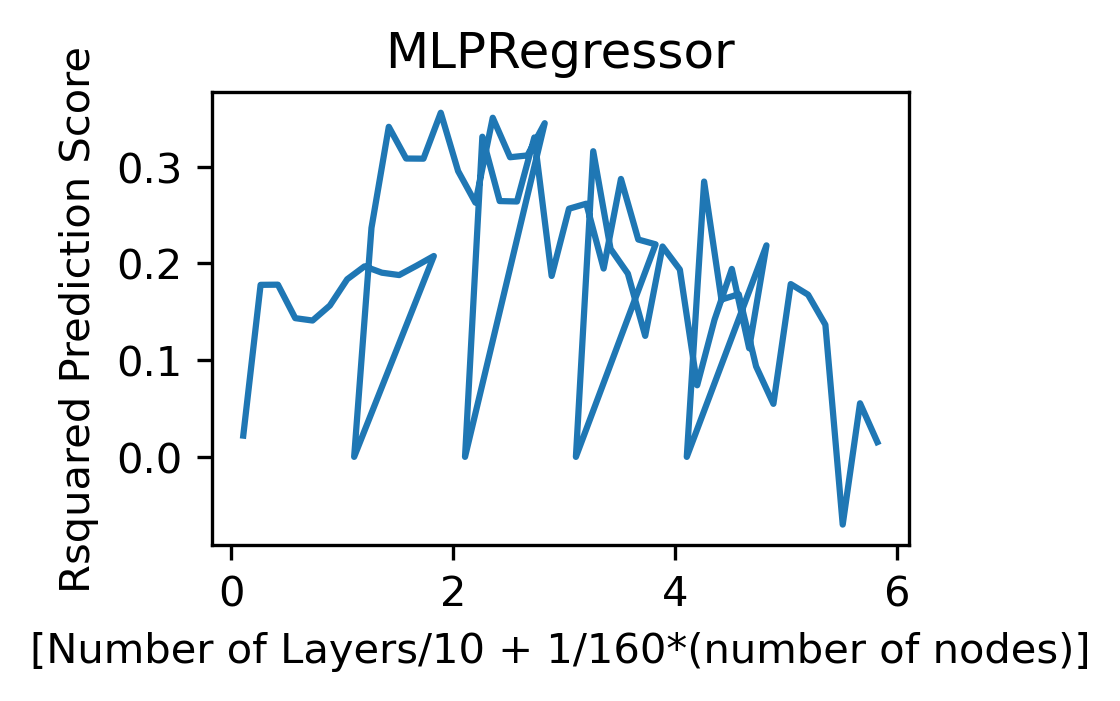

In [14]:
print(scores_list)
print(nidx)



fig = plt.figure(figsize = (3,2), dpi = 300)
plt.plot(nidx,scores_list)
plt.title("MLPRegressor")
plt.ylabel('Rsquared Prediction Score')
plt.xlabel('[Number of Layers/10 + 1/276*(number of nodes)]')
# plt.yticks(np.arange(0, .2, step=0.02))

[1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41]
[0.021950412928522622, 0.17790420903372406, 0.17809018723632986, 0.14345793273994312, 0.1409968064505832, 0.15652698297771994, 0.18369146503520373, 0.19705089568827816, 0.1904737831510337, 0.18803582478531, 0.19766770846775183, 0.20774598060417537, -2.1961409274684485e-05, 0.23680404344977657, 0.3413873653477001, 0.30857499482881734, 0.3084242646429738, 0.3559201225684907, 0.2956040957081434, 0.26292310073782343, 0.3507629367195211, 0.3099083193306973, 0.3117749725454487, 0.3451272733946912

Text(0.5, 1.0, 'MLPRegressor')

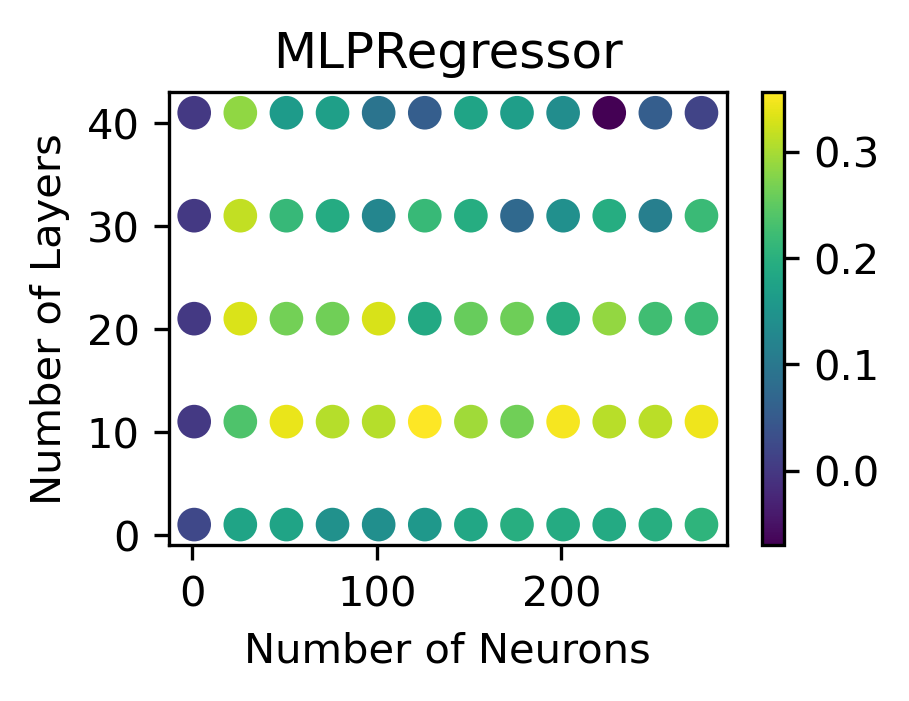

In [15]:

print(nueroidx)
print(layeridx)
print(scores_list)

fig = plt.figure(figsize = (3,2), dpi = 300)
plt.scatter(nueroidx,layeridx,50,scores_list)
plt.colorbar()
plt.ylabel('Number of Layers')
plt.xlabel('Number of Neurons')
plt.title("MLPRegressor")